In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv("AirPassengers.csv")
 
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df.dropna(inplace=True)
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)

<Axes: xlabel='Month'>

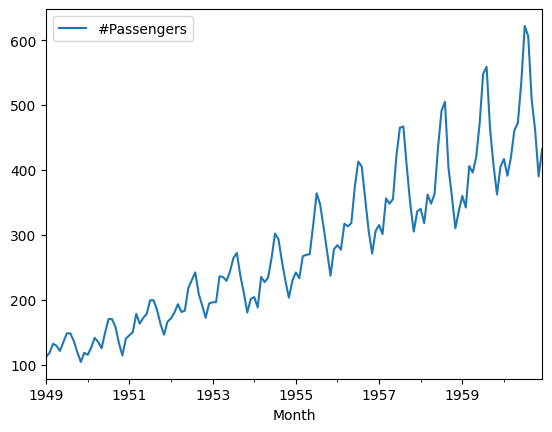

In [13]:
df.plot()

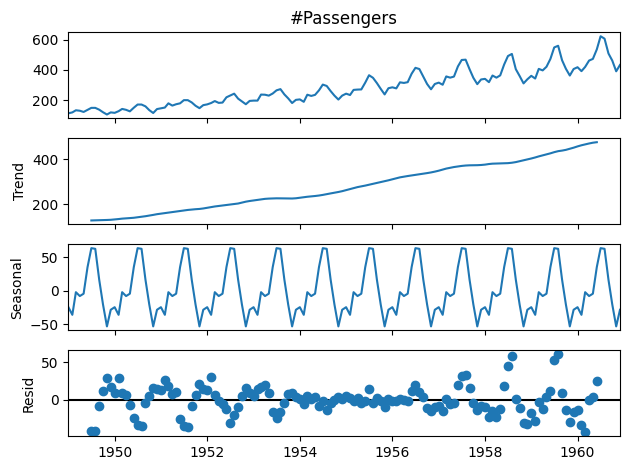

In [14]:
decompose_data = seasonal_decompose(df['#Passengers'], model="additive")
decompose_data.plot()
plt.show()

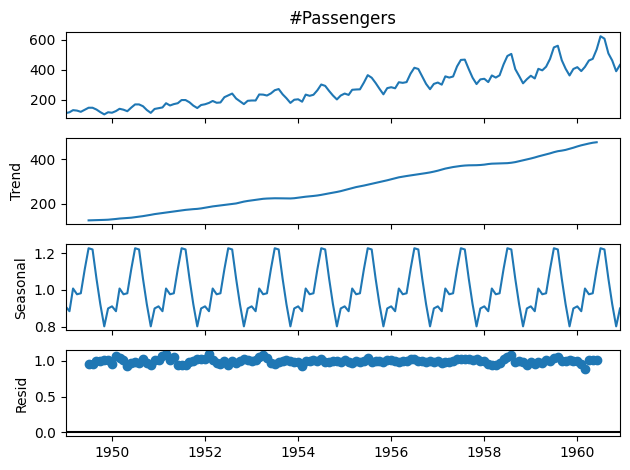

In [15]:
decompose_data = seasonal_decompose(df['#Passengers'], model="multiplicable")
decompose_data.plot()
plt.show()

<Axes: xlabel='Month'>

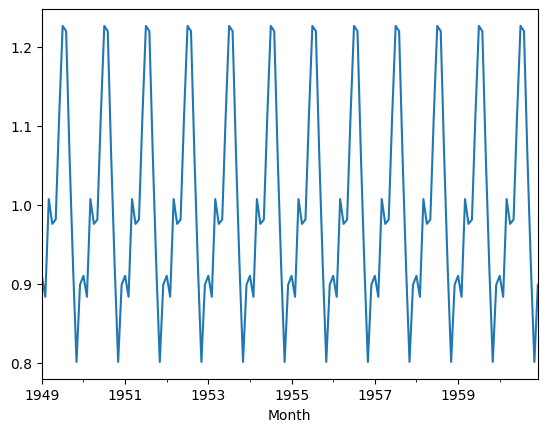

In [16]:
decompose_data.seasonal.plot()

<Axes: xlabel='Month'>

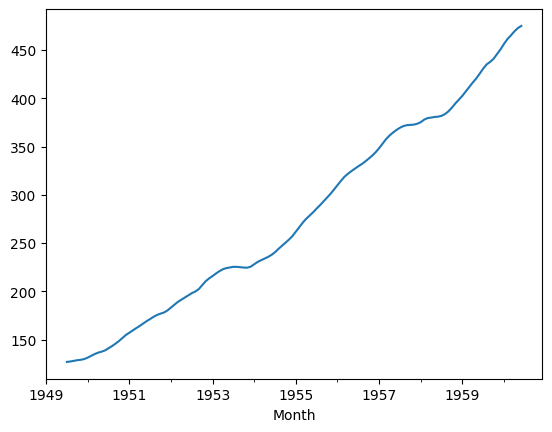

In [17]:
decompose_data.trend.plot()

## Stationary or NOT

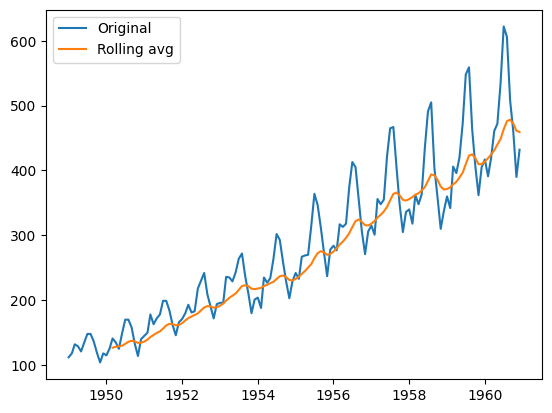

In [18]:
rolling_mean = df['#Passengers'].rolling(window=15).mean()

plt.plot(df['#Passengers'],label="Original")
plt.plot(rolling_mean,label="Rolling avg")
plt.legend()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
p-value: 0.991880


## Modelling

#### - Split data into train and test

In [20]:
#Split data into train and test
# Note not as in traditional ML, we cannt pick randomly
size = int(len(df) * 0.75)
X_train, X_test = df[0:size], df[size:len(df)]

##### Autoregression

In [17]:
from statsmodels.tsa.ar_model import AutoReg

lag=15
# fit model
model = AutoReg(X_train['#Passengers'], lags=lag)
model_fit = model.fit()


In [18]:
# let us start by exploring the performance on the training data
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = model_fit.predict(start_index, end_index).rename('Train Predicted') 

Train Score: 8.20 RMSE


<AxesSubplot:xlabel='Month'>

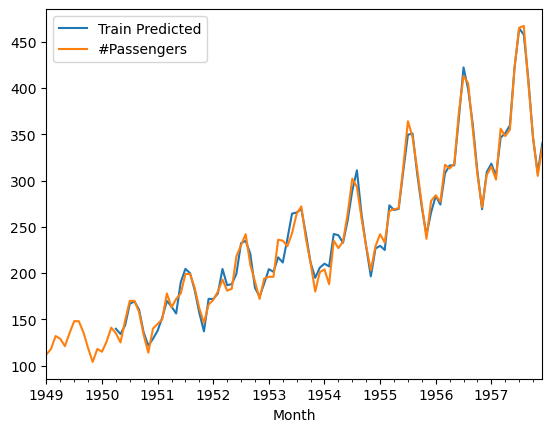

In [19]:
# Check performance
trainScore = math.sqrt(mean_squared_error(X_train['#Passengers'][lag:], train_prediction[lag:]))
print('Train Score: %.2f RMSE' % (trainScore))
# plot predictions and actual values 
train_prediction.plot(legend = True) 
X_train['#Passengers'].plot(legend = True) 

###### Tesing

Test Score: 37.49 RMSE


<AxesSubplot:xlabel='Month'>

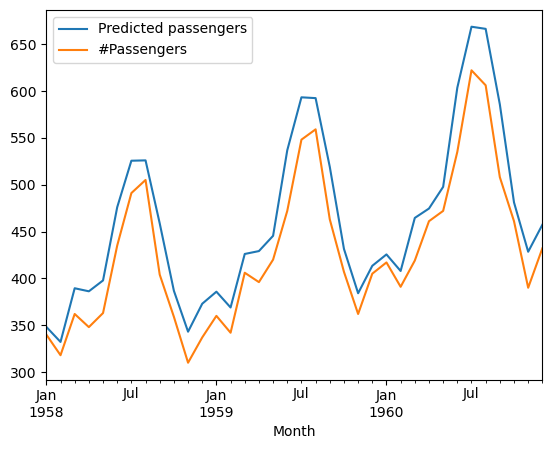

In [20]:
start_index = len(X_train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Predicted passengers') 


testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['#Passengers'].plot(legend = True) 

#### Moving Average model

Train Score: 16.50 RMSE


<AxesSubplot:xlabel='Month'>

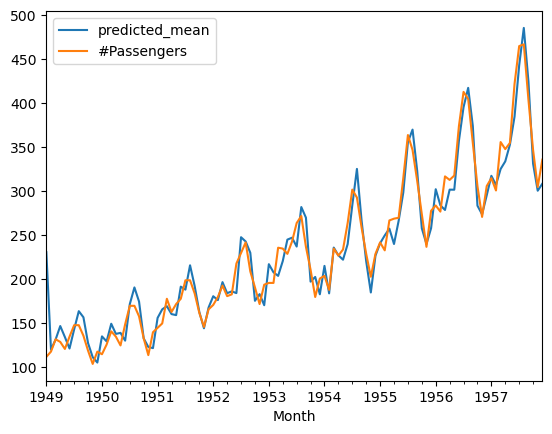

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X_train['#Passengers'], order=(0, 0, 18)) # only change the q value and keep p,d =0
model_fit = model.fit()

# let us start by exploring the performance on the training data
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = model_fit.predict(start_index, end_index) 

# Check performance
trainScore = math.sqrt(mean_squared_error(X_train['#Passengers'][lag:], train_prediction[lag:]))
print('Train Score: %.2f RMSE' % (trainScore))
# plot predictions and actual values 
train_prediction.plot(legend = True) 
X_train['#Passengers'].plot(legend = True) 

Test Score: 191.22 RMSE


<AxesSubplot:xlabel='Month'>

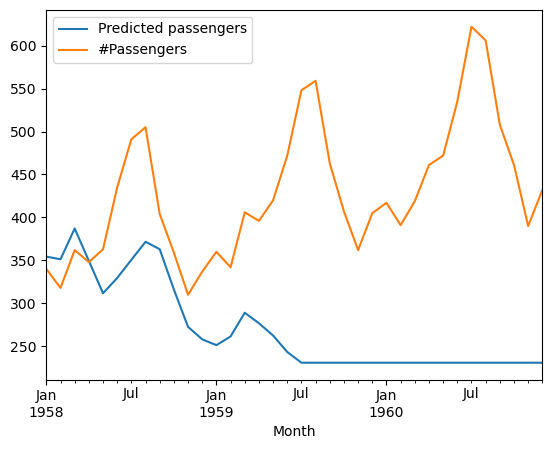

In [24]:
start_index = len(X_train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Predicted passengers') 


testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['#Passengers'].plot(legend = True) 

##### ARIMA

Train Score: 9.37 RMSE


<AxesSubplot:xlabel='Month'>

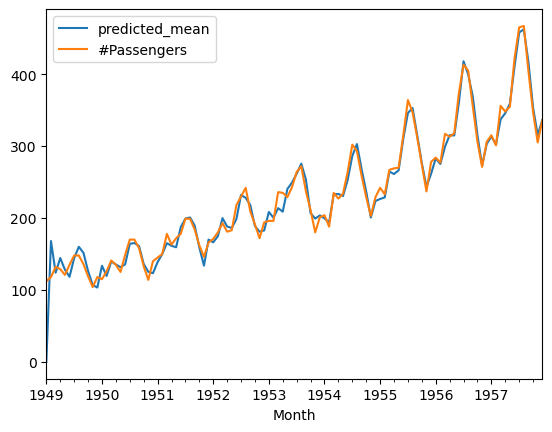

In [30]:
# fit model
model = ARIMA(X_train['#Passengers'], order=(12, 2, 12)) # note d=1 the TS will be stationary now
model_fit = model.fit()



# let us start by exploring the performance on the training data
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = model_fit.predict(start_index, end_index) 


# Check performance
trainScore = math.sqrt(mean_squared_error(X_train['#Passengers'][lag:], train_prediction[lag:]))
print('Train Score: %.2f RMSE' % (trainScore))
# plot predictions and actual values 
train_prediction.plot(legend = True) 
X_train['#Passengers'].plot(legend = True) 

Test Score: 23.99 RMSE


<AxesSubplot:xlabel='Month'>

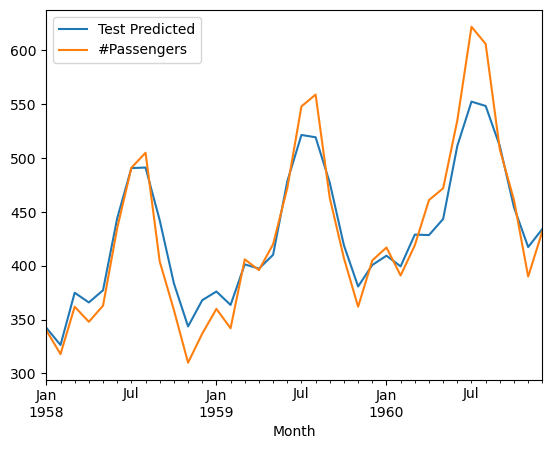

In [31]:
start_index = len(X_train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Test Predicted') 


testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['#Passengers'].plot(legend = True) 

In [21]:
"""
in the basic ARIMA model, we need to provide the p,d, and q values which are essential. 
We use statistical techniques to generate these values by performing the difference to eliminate 
the non-stationarity and plotting ACF and PACF graphs
"""

'\nin the basic ARIMA model, we need to provide the p,d, and q values which are essential. \nWe use statistical techniques to generate these values by performing the difference to eliminate \nthe non-stationarity and plotting ACF and PACF graphs\n'

In [ ]:
"""
SARIMA:
If our model has a seasonal component, we use a seasonal ARIMA model (SARIMA). 
In that case we have another set of parameters: P,D, and Q which describe the same associations as p,d, and q, 
but correspond with the seasonal components of the model
"""

### Auto-ARIMA

In [ ]:
"""
In Auto ARIMA, the model itself will generate the optimal p, d, and q values and P,D,Q
which would be suitable for the data set to provide better forecasting.

"""

In [32]:
from pmdarima.arima import auto_arima


In [33]:
arima_model = auto_arima(X_train['#Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 10, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=75)  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=705.081, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=707.730, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=704.186, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=704.801, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=704.001, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=704.472, Time=0.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=705.993, Time=0.49 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=705.691, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=704.376, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=707.075, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=705.875, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.064 seconds


In [34]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Mon, 08 May 2023   AIC                            704.001
Time:                                    06:26:39   BIC                            709.109
Sample:                                01-01-1949   HQIC                           706.065
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.000      66.410     119.090
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model =  SARIMAX(X_train['#Passengers'],  
                order = (1, 1, 0),  
                seasonal_order =(0, 1, 0, 12)) 
  
model_fit = model.fit()

Train Score: 9.72 RMSE


<AxesSubplot:xlabel='Month'>

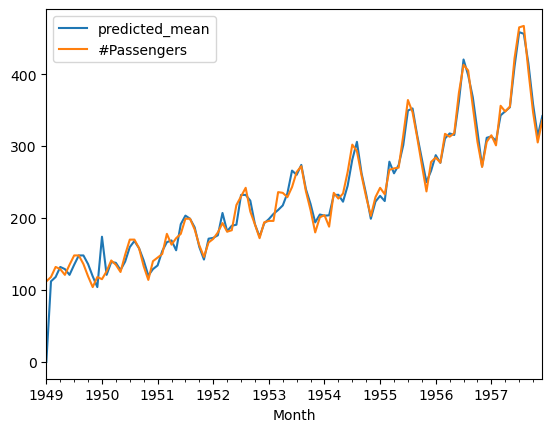

In [36]:

# let us start by exploring the performance on the training data
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = model_fit.predict(start_index, end_index) 


# Check performance
trainScore = math.sqrt(mean_squared_error(X_train['#Passengers'][lag:], train_prediction[lag:]))
print('Train Score: %.2f RMSE' % (trainScore))
# plot predictions and actual values 
train_prediction.plot(legend = True) 
X_train['#Passengers'].plot(legend = True) 

Test Score: 22.13 RMSE


<AxesSubplot:xlabel='Month'>

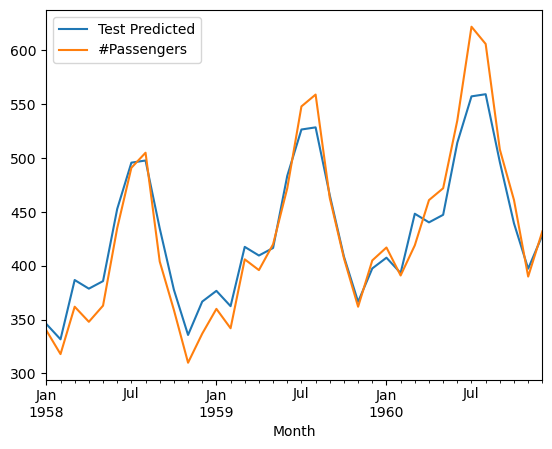

In [39]:
start_index = len(X_train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Test Predicted') 


testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['#Passengers'].plot(legend = True) 